# `20181031a` - Other tests - new board =)


In [2]:
#!/usr/bin/python
import spidev
#import RPi.GPIO as GPIO
import time
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import json
import time
from pyUn0 import *
%matplotlib inline

In [2]:
x = us_spi()
x.JSON["firmware_version"]="f_un0"
x.JSON["experiment"]["description"]="Trying the v1.0 board"
x.JSON["experiment"]["probe"]="calibration"
x.JSON["experiment"]["target"] = "calibration"
x.JSON["V"]="25"
x.JSON["N"] = 1 # Experiment ID

In [3]:
x.init()                                    # Inits the FPGA
x.JSON["N"] = 1 
Curve = x.CreateDACCurve(200,500,True)[0]   # Sets the DAC, 50mV to 850mv

pyUn0.py:149: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
  GPIO.setup(CS_FLASH,GPIO.OUT)
pyUn0.py:152: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
  GPIO.setup(PRESET,GPIO.OUT)


Reset GPIO 23 - Low 1s
Reset GPIO 23 - High 0.2s
spi.cshigh is False
spi mode is 1
spi maxspeed is 2000000hz
Setting up the DAC


In [4]:
x.TestSPI(3)

In [30]:
Curve = x.CreateDACCurve(200,400,True)[0]
print Curve

Setting up the DAC
[200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 0, 0]


In [31]:
x.setPeriodAcq(200000)

Period between two acquisitions: 20000 us -- 0x0 0x4e 0x20


200000

In [32]:
x.setMultiLines(True)				        # Multi lines acquisition	
x.setNLines(3)				            # Setting the number of lines
x.setMsps(4) 					            # Acquisition Freq
A = x.setTimings(200,100,2000,3000,200000)	# Settings the series of pulses

Remember to indicate how many lines
Number of lines: 3
Acquisition frequency set at 12.0 Msps
Pulse width: 200  ns --  0x14
Pulses delay: 300  ns --  0x1e
Poff: 2300  ns --  0x0 0xe6
Delay between: 3000 ns --  0x1 0x80
Acquisition length:  200000 ns --  0x64 0x0
setPulseTrain Lacq 200000
NAcq = 7092


In [33]:
x.JSON["experiment"]["description"]="Testing if new batch is fine"
x.JSON["data"] = x.doAcquisition()
x.JSON["N"] = x.JSON["N"] + 1 

0%
9%
19%
29%
39%
49%
59%
69%
79%
89%
99%
Took 1.70 seconds to transfer.
for 14186 transfers of data
20181031a-4.json: file saved.


In [34]:
LastJSON = x.JSON["N"] -1
print LastJSON-1

3


In [35]:
for MyDataFile in os.listdir("./"):
    if MyDataFile.endswith(str(LastJSON)+".json"):
        y = us_json()
        y.JSONprocessing("./"+MyDataFile)

Data acquired


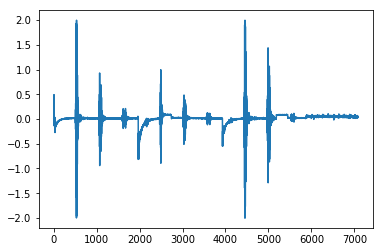

In [36]:
plt.plot(y.tmp)
plt.show()

Data acquired


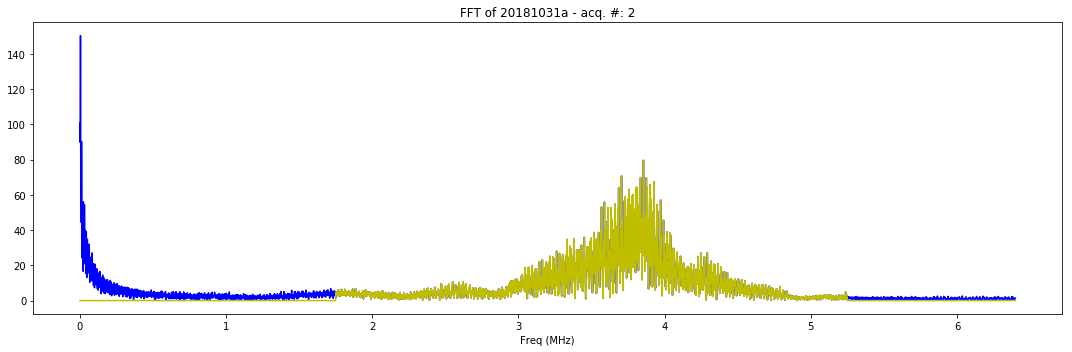

Not an image


ZeroDivisionError: integer division or modulo by zero

In [6]:
for MyDataFile in os.listdir("data/"):
    if MyDataFile.endswith("-2.json"):
        x = us_json()
        x.JSONprocessing("data/"+MyDataFile)
        x.mkFFT()
        CleanImage = x.mk2DArray()
        S = x.mkSpectrum(CleanImage)

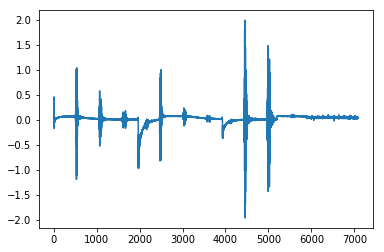

In [7]:
plt.plot(x.tmp)
plt.show()

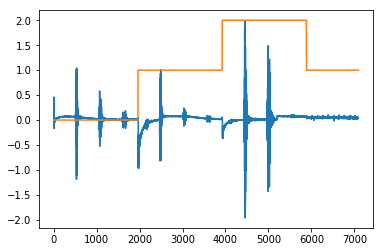

In [9]:
plt.plot(x.tmp)
plt.plot(x.IDLine)
plt.show()